
# Support Vector Machines on Iris flower data set

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

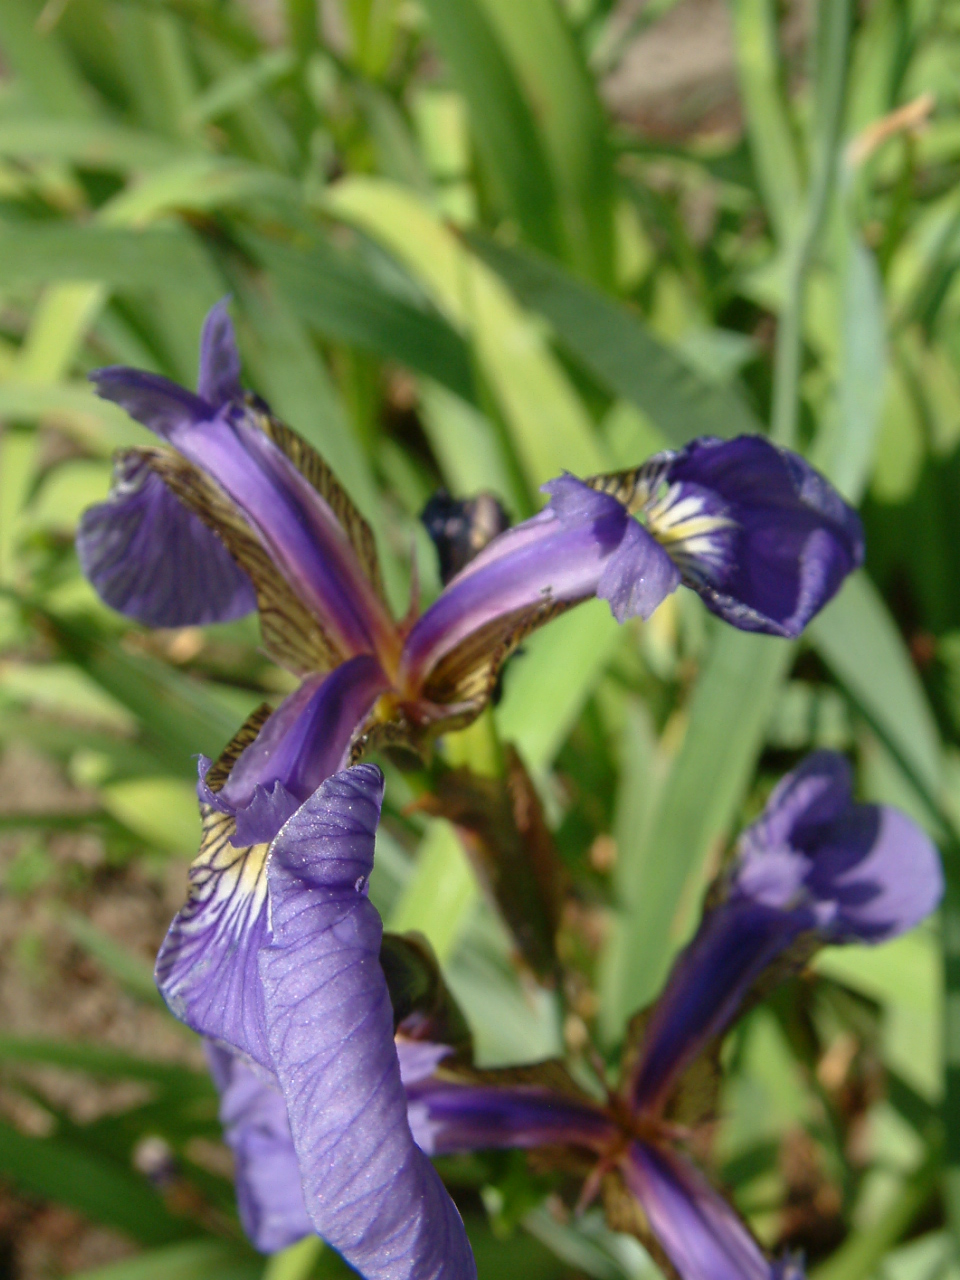

In [1]:
# The Iris Setosa
from IPython.display import Image

url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url, width=300, height=300)

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Loading the data

In [2]:
# load libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# load data
iris = sns.load_dataset('iris') 

## Exploratory Data Analysis

In [4]:
iris.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species
85,6.0,3.4,4.5,1.6,versicolor
27,5.2,3.5,1.5,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
60,5.0,2.0,3.5,1.0,versicolor
147,6.5,3.0,5.2,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
131,7.9,3.8,6.4,2.0,virginica


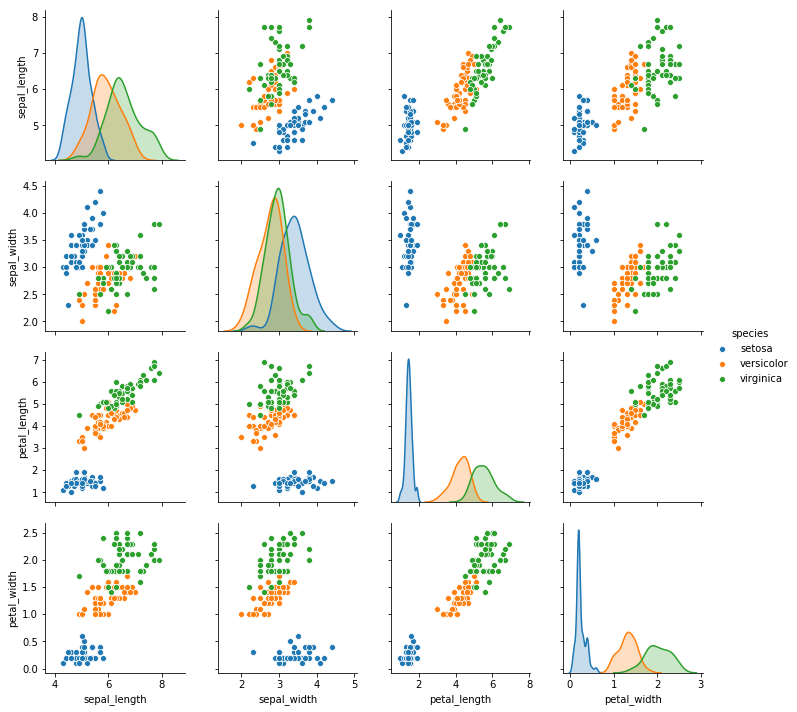

In [5]:
# sns pairplot of the data set
sns.pairplot(iris, hue='species')

**Creating a kde plot of sepal_length versus sepal width for setosa species of flower.**

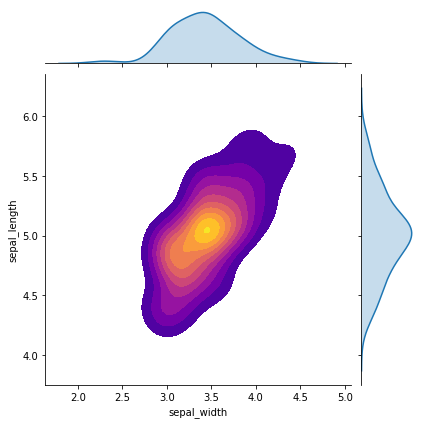

In [6]:
setosa = iris[iris['species']=='setosa']
sns.jointplot(setosa['sepal_width'], setosa['sepal_length'], 
              kind='kde', cmap="plasma", shade_lowest=False)

### Train Test Split

** Splitting data into a training set and a testing set.**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28)

### Train Support Vector Machine Classifier

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Model Evaluation

In [12]:
predictions = svc.predict(X_test)
len(predictions)

43

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(confusion_matrix(y_test, predictions))

[[14  0  0]
 [ 0 13  1]
 [ 0  0 15]]


In [15]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        15

avg / total       0.98      0.98      0.98        43



### Using Gridsearch to tune parameters

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
             'kernel': ['rbf', 'linear', 'poly']} 

In [18]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [19]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [21]:
grid.best_score_

0.9719626168224299

In [22]:
grid_predictions = grid.predict(X_test)

In [23]:
print(confusion_matrix(y_test, grid_predictions))

[[14  0  0]
 [ 0 13  1]
 [ 0  0 15]]


In [24]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        15

avg / total       0.98      0.98      0.98        43

